첫 번째 시간
- 실습

ㄴ### 목표
- 호준씨, 지현씨 얼굴을 분류하는 이진 분류 신경망 모델을 만들어보자!

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#PIL : Python imaging Library(이미지 처리 라이브러리)
from PIL import Image

In [ ]:
%cd

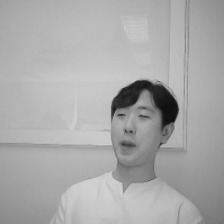

In [8]:
# 이미지 불러와서 흑백으로 변환
# convert -> L(루미너스 ; 빛의 밝기) : 흑백, RGB: 컬러
img = Image.open("data/Class 1-samples/0.jpg").convert('L')
img

In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/17.SW 캠프 데이터 비즈니스 과정/

/content/drive/MyDrive/Colab Notebooks/17.SW 캠프 데이터 비즈니스 과정


In [ ]:
# 불러온 이미지 데이터를 numpy 배열로 변환
# (기계가 인식할 수 있도록 이미지를 수치 데이터로 변환시키는 과정)
# 가로 (행), 세로(열) 픽셀수로 변경됨
# 학습용 데이터들은 사전에 다 수치데이터로 변환되어져 있던 상태



In [12]:
img_array = np.array(img)

In [13]:
img_array

array([[159, 159, 160, ..., 139, 139, 138],
       [159, 160, 160, ..., 141, 139, 138],
       [159, 160, 160, ..., 142, 140, 139],
       ...,
       [138, 137, 137, ..., 119, 118, 118],
       [137, 136, 136, ..., 118, 118, 118],
       [136, 135, 135, ..., 118, 118, 119]], dtype=uint8)

- 호준씨, 짛현씨 각각 200장의 데이터를 전부 수치데이터로 저장될 자리

In [38]:
# 데이터셋 구성하기
class1_list = []   # 호준씨 데이터    ; 200장
    # 지현씨 데이터

for i in range(0, 200, 1) :
  # 1. 호준씨 데이터 작업
  img1 = Image.open("data/Class 1-samples/" + str(i) + ".jpg").convert("L")
  img_array1 = np.array(img1)   #배열변환작업 img -> numpy 배열
  # 변환된 배열 데이터를 빈 리스트에 하나씩 추가해주기
  class1_list.append(img_array1)

In [14]:
from tqdm import tqdm
# tqdm : 진행이라는 의미를 갖고있음
# 반복문 실행시 어느정도 실행되고 있는지 %로 알려줌

In [39]:
# 데이터셋 구성하기
  # 호준씨 데이터    ; 200장
class2_list = []    # 지현씨 데이터

for i in range(0, 200, 1) :
  # 1. 호준씨 데이터 작업
  img2 = Image.open("data/Class 2-samples/" + str(i) + ".jpg").convert("L")
  img_array2 = np.array(img2)   #배열변환작업 img -> numpy 배열
  # 변환된 배열 데이터를 빈 리스트에 하나씩 추가해주기
  class2_list.append(img_array2)

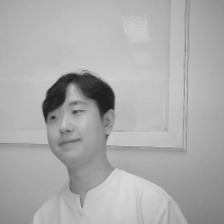

In [21]:
img1

In [22]:
class1_list

[array([[159, 159, 160, ..., 139, 139, 138],
        [159, 160, 160, ..., 141, 139, 138],
        [159, 160, 160, ..., 142, 140, 139],
        ...,
        [138, 137, 137, ..., 119, 118, 118],
        [137, 136, 136, ..., 118, 118, 118],
        [136, 135, 135, ..., 118, 118, 119]], dtype=uint8),
 array([[163, 161, 160, ..., 143, 142, 141],
        [163, 161, 161, ..., 143, 142, 141],
        [163, 162, 161, ..., 143, 142, 141],
        ...,
        [139, 139, 139, ..., 122, 122, 121],
        [138, 138, 139, ..., 121, 121, 121],
        [137, 138, 139, ..., 121, 121, 121]], dtype=uint8),
 array([[161, 161, 161, ..., 144, 143, 142],
        [161, 161, 162, ..., 144, 143, 143],
        [161, 162, 162, ..., 145, 144, 144],
        ...,
        [141, 141, 140, ..., 123, 122, 122],
        [140, 140, 139, ..., 122, 122, 121],
        [139, 138, 138, ..., 122, 121, 121]], dtype=uint8),
 array([[164, 165, 166, ..., 146, 146, 146],
        [164, 165, 166, ..., 146, 146, 146],
        [164, 16

In [40]:
# 리스트를 기계학습에 바로 상요할 수 없기 때문에 numpy 배열로 변환시켜주기
# 이미지 하나라도 배열로 이를 담고 있는 리스트 자체도 배열로 변환시키기
class1_array = np.array(class1_list)
class2_array = np.array(class2_list)

In [41]:
class1_array.shape, class2_array.shape

((200, 224, 224), (200, 224, 224))

In [44]:
data = np.concatenate([class1_array, class2_array])   #좌측부터 순서대로 붙음

In [45]:
data.shape   #호준씨 데이터 200ro + 지현씨 데이터 200개가 순서대로 담겨져 있음

(400, 224, 224)

In [46]:
# a문제 데이터-> 정답데이터 만들기 (문제와 정답의 순서를 일치시켜야함)
# 0: 호준씨 데이터 정답, 1: 지현씨 데이터 정답이라 정함
target = np.array([0]*200 + [1]*200)
target.shape

(400,)

In [76]:
# 학습, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=11)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 224, 224)
(80, 224, 224)
(320,)
(80,)


In [55]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [52]:
# 무조건 train, test만 나눠주는게 아니라 데이터를 일정 비율로 랜덤하게 나눠주는 기능을 갖고 있음
from sklearn.model_selection import train_test_split

In [74]:

# ### 직접 진행해보기!
# 1. 신경망 구조 설계
model1 = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)\mo
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)
model1.add(Flatten(input_shape=(224, 224)))
model1.add(Dense(800, activation = 'sigmoid'))   #x_train 데이터의 특성의 개수 가 30
model1.add(Dense(400, activation='sigmoid'))
model1.add(Dense(200,activation='sigmoid'))
model1.add(Dense(100,activation='sigmoid'))
model1.add(Dense(10,activation='sigmoid'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

# 2. 학습 및 평가방법 설정
model1.compile(loss='binary_crossentropy',
              optimizer = 'Adam',
              metrics = ['acc']
              )


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 50176)             0         
                                                                 
 dense_70 (Dense)            (None, 800)               40141600  
                                                                 
 dense_71 (Dense)            (None, 400)               320400    
                                                                 
 dense_72 (Dense)            (None, 200)               80200     
                                                                 
 dense_73 (Dense)            (None, 100)               20100     
                                                                 
 dense_74 (Dense)            (None, 10)                1010      
                                                                 
 dense_75 (Dense)            (None, 1)               

In [78]:
h1 = model1.fit(X_train, y_train,   # validation data set 을 자동으로 분류시키는 명령이 있다
                batch_size = 128,
              epochs = 300,
                validation_split = 0.2
              )


Epoch 1/300
2/2 [==============================] - 3s 304ms/step - loss: 0.7201 - acc: 0.5039 - val_loss: 0.7139 - val_acc: 0.4531
Epoch 2/300
2/2 [==============================] - 0s 74ms/step - loss: 0.6995 - acc: 0.5039 - val_loss: 0.6969 - val_acc: 0.4531
Epoch 3/300
2/2 [==============================] - 0s 63ms/step - loss: 0.6953 - acc: 0.4414 - val_loss: 0.6914 - val_acc: 0.5469
Epoch 4/300
2/2 [==============================] - 0s 61ms/step - loss: 0.6932 - acc: 0.4961 - val_loss: 0.6901 - val_acc: 0.5469
Epoch 5/300
2/2 [==============================] - 0s 63ms/step - loss: 0.6943 - acc: 0.4961 - val_loss: 0.6897 - val_acc: 0.5469
Epoch 6/300
2/2 [==============================] - 0s 67ms/step - loss: 0.6948 - acc: 0.4961 - val_loss: 0.6896 - val_acc: 0.5469
Epoch 7/300
2/2 [==============================] - 0s 62ms/step - loss: 0.6949 - acc: 0.4961 - val_loss: 0.6898 - val_acc: 0.5469
Epoch 8/300
2/2 [==============================] - 0s 60ms/step - loss: 0.6946 - acc: 0.4

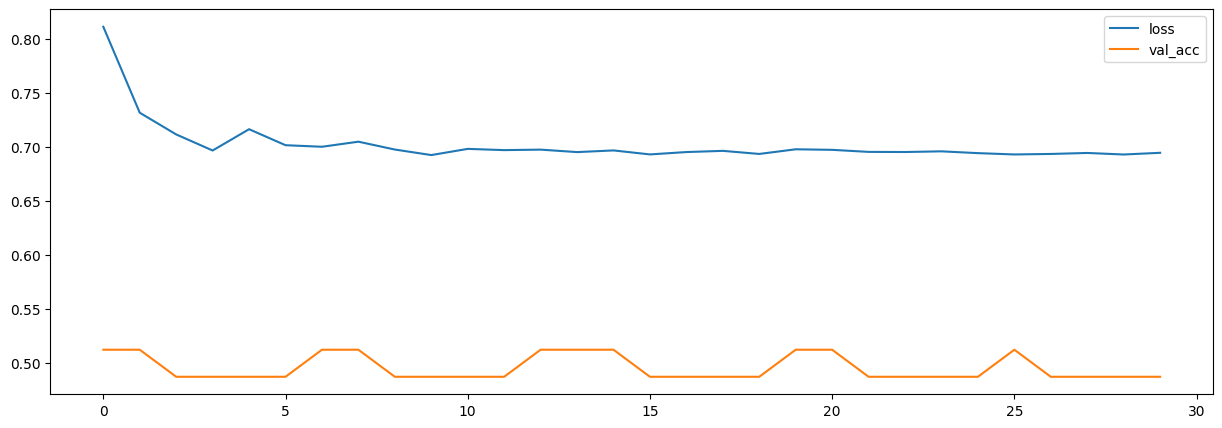

In [79]:
# 3. 시각화
plt.figure(figsize=(15,5))

plt.plot(h.history['loss'], label='loss')
plt.plot(h.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [88]:

# ### 직접 진행해보기!
# 1. 신경망 구조 설계
model2 = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)\mo
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)
model2.add(Flatten(input_shape=(224, 224)))
model2.add(Dense(800, activation = 'relu'))   #x_train 데이터의 특성의 개수 가 30
model2.add(Dense(400, activation='relu'))
model2.add(Dense(200,activation='relu'))
model2.add(Dense(100,activation='relu'))
model2.add(Dense(10,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))   #이진 분류 확실히
model2.summary()

# 2. 학습 및 평가방법 설정
model2.compile(loss='binary_crossentropy',
              optimizer = 'Adam',
              metrics = ['acc']
              )


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 50176)             0         
                                                                 
 dense_88 (Dense)            (None, 800)               40141600  
                                                                 
 dense_89 (Dense)            (None, 400)               320400    
                                                                 
 dense_90 (Dense)            (None, 200)               80200     
                                                                 
 dense_91 (Dense)            (None, 100)               20100     
                                                                 
 dense_92 (Dense)            (None, 10)                1010      
                                                                 
 dense_93 (Dense)            (None, 1)               

In [94]:
h2 = model2.fit(X_train, y_train,   # validation data set 을 자동으로 분류시키는 명령이 있다
                batch_size = 128,
              epochs = 300,
                validation_split = 0.2
              )

Epoch 1/300
2/2 [==============================] - 0s 258ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/300
2/2 [==============================] - 0s 124ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/300
2/2 [==============================] - 0s 139ms/step - loss: 1.9307e-14 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/300
2/2 [==============================] - 0s 164ms/step - loss: 0.2021 - acc: 0.9922 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/300
2/2 [==============================] - 0s 104ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/300
2/2 [==============================] - 0s 97ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/300
2/2 [==============================] - 0s 120ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/300
2/2 [===============

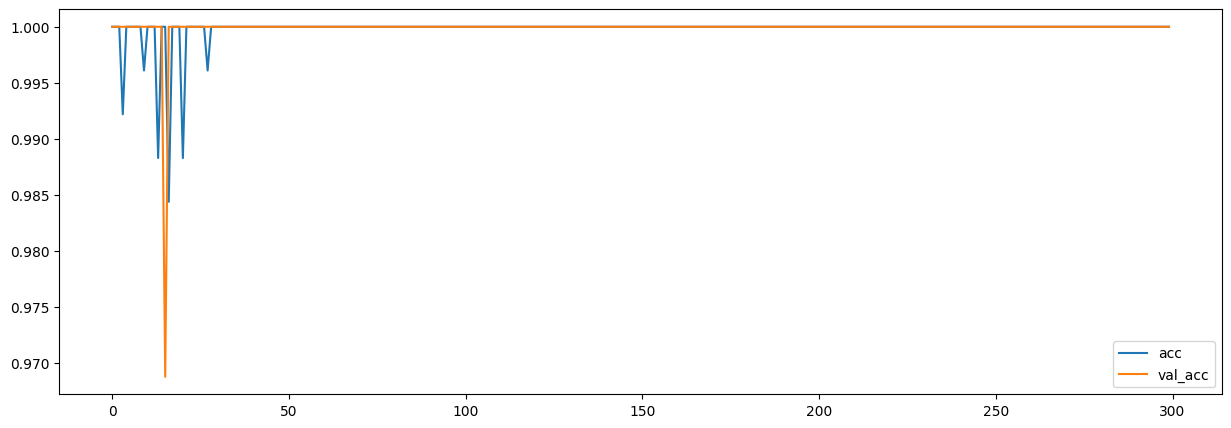

In [95]:
# 3. 시각화
plt.figure(figsize=(15,5))

plt.plot(h2.history['acc'], label='acc')
plt.plot(h2.history['val_acc'], label='val_acc')
plt.legend()
plt.show()